In [143]:
from __future__ import print_function
import os
from time import time
from os import listdir
from os.path import isdir

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60) 
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
SPINE_COLOR = 'gray'

%matplotlib inline



/home/doaa/anaconda3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [196]:
# Constants
NUM_TOPICS = 10
base_dir = '/home/doaa/Documents/Spring2016_SE_Project/'
max_df = 0.7
min_df = 0.3
# suffix = str(max_df)+'_'+str(min_df) # for 10
lang = 'categories_'
# lang = 'all_'
# lang = ''

suffix = lang + str(NUM_TOPICS)+'_'+str(max_df)+'_'+str(min_df)
print(suffix)

categories_10_0.7_0.3


In [197]:
proj_topic = pd.read_csv(os.path.join(base_dir, 'results/project-topic_'+suffix+'.csv'),
                             index_col=0)
#  normalize values
for i in proj_topic.index:
    proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]] = \
                proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]]\
                    / (proj_topic.ix[i, proj_topic.columns[0:NUM_TOPICS]].max())
# To date
proj_topic.date = pd.to_datetime(proj_topic.date)
proj_topic.sort_values('date', inplace=True)
print(proj_topic.shape)
proj_topic.head()

(106, 12)


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date
index,,,,,,,,,,,,
0hh1,0.028756,0.012369,0.216766,0.000023,0.000023,0.386535,0.007014,0.000023,1.000000e+00,0.152223,0hh1,2016-01-01
pakyow,0.000009,0.000009,0.000009,0.021151,1.000000,0.069239,0.000009,0.296127,2.224413e-01,0.000009,pakyow,2016-01-01
oryx,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.908299,2.543116e-06,1.000000,oryx,2016-01-01
openage,0.267903,0.569120,1.000000,0.388766,0.000013,0.285047,0.039552,0.000013,1.302907e-05,0.221763,openage,2016-01-01
nupic,0.062032,0.000344,0.010436,0.143763,0.142702,0.141326,0.009469,0.008191,4.780554e-07,1.000000,nupic,2016-01-01


In [187]:
topics = pd.read_csv(os.path.join(base_dir, 'results/topic_word_'+suffix+'.csv'), index_col=0)
topics_freq = pd.read_csv(os.path.join(base_dir, 'results/topic_word_freq_'+suffix+'.csv'), index_col=0)

topics.head(10)

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22,word23,word24,word25,word26,word27,word28,word29,word30,word31,word32,word33,word34,word35,word36,word37,word38,word39,word40,word41,word42,word43,word44,word45,word46,word47,word48,word49
topic#0,date,high,offset,volum,layer,zoom,push,parent,typeof,add,color,attr,prototyp,filter,scroll,extend,anim,elem,grid,tile,label,canva,button,context,click,mous,undefin,axi,callback,scale,bound,tick,edg,prop,window,render,month,inst,opac,seri,draw,activ,timeout,trigger,max,dom,view,bind,hide,selector
topic#1,free,flag,thi,unsign,info,0x,tabl,softwar,byte,buffer,follow,func,bit,copyright,struct,limit,offset,window,face,written,heap,context,condit,product,memori,project,provid,stream,redistribut,block,lock,engin,uint8,address,distribut,frame,group,token,stack,page,disclaim,hint,entri,alloc,intern,header,librari,printf,decod,proc
topic#2,buffer,color,collis,licens,bodi,render,shape,materi,vertex,copyright,limit,listen,float,map,constraint,offset,physic,imag,local,scale,manag,java,asset,world,control,vertic,byte,rotat,thi,light,condit,link,softwar,add,direct,anim,list,transform,graphic,bound,soft,matrix,provid,int,id,axi,filter,triangl,max,frame
topic#3,color,word,kind,dict,command,trace,whitespac,menu,window,deleg,cursor,true,widget,fals,list,flag,buffer,bodi,frame,root,button,import,parent,charact,attr,fname,font,skip,project,tree,search,keyword,pattern,free,delet,oper,edit,label,icon,comment,python,func,indent,info,expand,tab,mous,ignor,script,screen
topic#4,meta,dom,softwar,offset,shape,stream,buffer,list,bool,color,add,field,render,max,num,collis,vertex,light,id,info,consol,world,profil,materi,devic,control,parent,block,ctrl,po,transform,new,scale,ref,flag,manag,regist,connect,vector,platform,map,bodi,extent,rect,plane,min,window,group,tabl,assert
topic#5,expect,equal,field,properti,date,rel,color,geometri,entiti,tile,undefin,instanc,rectangl,provid,develop,context,primit,view,model,stream,bound,collect,vertex,imag,debug,prototyp,render,offset,end,core,command,materi,interv,constant,outlin,buffer,frame,matrix,token,link,indic,widget,destroy,map,month,day,rang,add,compon,label
topic#6,transform,axe,figur,label,imag,axi,color,encod,thi,font,activ,dict,draw,sequenc,metric,scale,rang,patch,cell,canva,render,step,backend,locat,offset,grid,config,num,tick,segment,window,func,verbos,mask,record,column,region,shape,spec,alpha,angl,connect,tran,unit,instanc,collect,pattern,info,zero,prop
topic#7,licens,assert,context,factori,properti,equal,author,link,annot,map,applic,handler,transact,java,session,resourc,resolv,express,manag,definit,apach,list,mock,distribut,paramet,header,configur,config,view,web,true,connect,condit,specif,listen,local,entiti,loader,limit,copyright,add,field,instanc,obtain,proxi,kind,languag,permiss,expect,softwar
topic#8,elem,editor,expect,callback,manag,equal,command,softwar,prototyp,context,view,hint,offset,id,extens,export,menu,parent,selector,prop,token,info,properti,undefin,window,filter,promis,typeof,add,project,provid,push,list,inlin,rang,dialog,buffer,bracket,bind,stream,edit,header,run,handler,activ,attr,tag,search,thi,live
topic#9,field,assert,model,equal,blob,templat,date,view,datetim,filter,connect,output,encod,relat,dict,tabl,label,author,password,meta,context,databas,case,articl,delet,email,unicod,column,render,layer,manag,site,client,book,doctyp,session,rais,custom,instanc,choic,post,oper,expect,parent,thi,lookup,python,page,app,integ


In [188]:
topics_freq.head(10)

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,word11,word12,word13,word14,word15,word16,word17,word18,word19,word20,word21,word22,word23,word24,word25,word26,word27,word28,word29,word30,word31,word32,word33,word34,word35,word36,word37,word38,word39,word40,word41,word42,word43,word44,word45,word46,word47,word48,word49
topic#0,10304.864721,6288.276068,6189.880948,6104.113196,5170.258697,4028.110076,4014.553698,3923.800697,3848.270788,3651.548677,3580.577850,3436.419165,3332.614964,3148.552566,2951.220010,2856.438827,2773.754051,2675.394597,2629.736217,2625.862695,2588.046486,2440.054904,2405.144243,2324.440630,2281.564981,2272.738965,2247.130737,2212.392168,2127.767403,2036.163212,1994.700803,1933.045166,1928.641665,1902.229964,1894.317230,1866.654747,1850.440160,1833.338888,1828.500525,1824.515861,1798.015792,1788.031211,1781.909896,1773.220695,1752.620309,1586.743766,1574.046138,1567.106554,1548.560264,1511.409541
topic#1,21987.140787,20978.689896,19351.292824,18590.806192,18545.367419,18259.244462,17854.597096,15986.256800,13136.615976,12443.634425,12440.699922,12008.769710,11659.475320,10787.065966,10611.150201,9995.559589,9872.471713,9830.890367,9578.249348,9488.286474,9293.580245,8799.288438,8604.466368,8421.420603,7948.125437,7794.585102,7742.397645,7492.568761,7283.606536,7259.258934,7255.740681,6967.968150,6736.579779,6671.895510,6654.010716,6635.473729,6475.236554,6441.870322,6417.906688,6387.316219,6218.082295,5978.514892,5975.012303,5970.807399,5949.302518,5901.804752,5869.222674,5801.579533,5708.407524,5635.671548
topic#2,22952.012890,13034.817327,12928.607716,12531.414439,11089.995805,10897.629842,9771.557272,8840.988865,8337.758898,8181.200261,8159.631422,7883.505725,7881.556255,7726.842125,7334.158188,7239.055741,7043.502716,7032.698602,6851.104786,6677.652284,6635.444005,6513.171717,6418.202642,6306.649457,6078.776067,6048.096075,6027.085794,6002.841442,5975.852237,5641.366127,5576.347839,5533.265613,5522.002818,5504.332381,5339.151216,5331.942067,5234.852218,5203.104113,5076.488466,5056.255958,5048.109472,4996.632923,4892.432869,4807.922718,4707.900143,4670.364055,4438.401341,4384.698817,4294.004910,4249.613576
topic#3,19501.363635,15479.001686,9893.128518,8376.519132,8215.756446,7984.175037,7984.060976,7687.665716,7278.772593,6819.852836,6264.809592,6259.906791,5823.354196,5379.116938,5319.399441,4988.348258,4835.269108,4808.410126,4722.900164,3784.121257,3783.146226,3759.098643,3750.087393,3647.670370,3646.269249,3611.477379,3534.094029,3442.162478,3376.726527,3294.252027,3216.869173,3180.421679,3137.610815,3115.631173,3054.680960,2982.353363,2963.955255,2867.873313,2844.567604,2833.472605,2804.571617,2739.642832,2699.036203,2615.343708,2615.279569,2536.485848,2519.937991,2519.002356,2480.930540,2469.399469
topic#4,24705.524159,17049.781842,12212.276956,11732.702507,11714.504664,11455.180214,10417.771659,9841.961585,9281.380280,8542.427517,8314.641324,8065.577292,7887.939040,7818.510454,7433.828993,6274.543847,6204.663241,6188.907588,6154.285925,6138.162914,5938.000695,5819.748178,5776.049912,5755.086175,5699.894128,5451.676746,5383.402906,5360.282717,5308.875048,5099.379087,5064.801914,4847.124311,4842.833646,4806.667514,4715.249286,4668.163325,4654.422007,4643.157290,4628.442279,4507.047482,4343.296902,4336.331659,4318.370932,4245.214692,4050.041606,4026.722769,3979.107693,3893.792110,3882.475053,3871.376194
topic#5,23813.090292,15691.262109,13950.593542,13333.733718,13003.084057,11369.526018,10485.521612,10381.928513,7588.458563,6815.781862,6110.204791,6002.728958,5867.468339,5818.140503,5558.821946,5282.703678,5263.600150,4832.516378,4777.431803,4753.866772,4693.231963,4396.816015,4275.834444,4275.120672,4028.016516,3967.742890,3930.255142,3801.348213,3793.616259,3788.926290,3768.005563,3733.036818,3668.583243,3659.543845,3529.335481,3509.371012,3307.097649,3301.143534,3215.197136,3119.378683,3079.539571,3070.102569,3035.927244,2967.264796,2928.814003,2830.349825,2826.937771,2818.769

ValueError: num must be 1 <= num <= 6, not 7

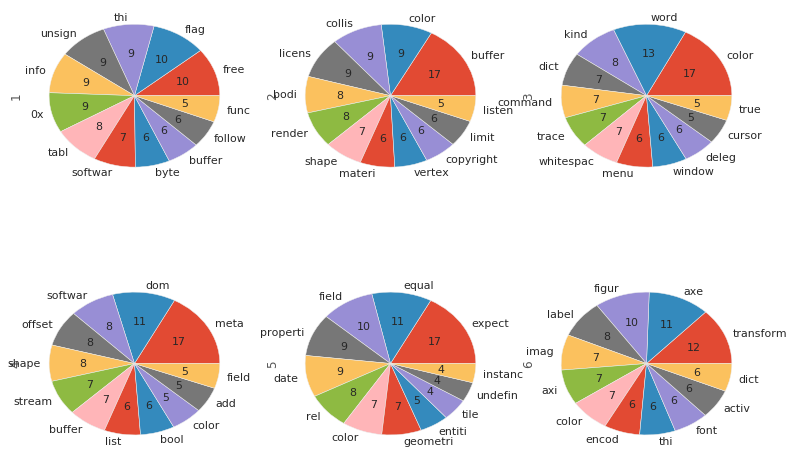

In [189]:
fig = plt.figure(1, figsize=(13,8))

df = topics_freq.reset_index(level=0)
df = df.drop('index', axis=1).T[0:12]
df
for i in range(1,NUM_TOPICS):
    ax = fig.add_subplot(2,3,i)
    df[i].astype(float).plot.pie(ax=ax, label=None, fontsize=11,
                    labels=topics.T.ix[0:12, i], autopct='%.d')
plt.tight_layout()
fig.savefig('topic-word'+suffix+'.png', bbox_inches='tight', dpi=400)

In [164]:
latests_projects = proj_topic[proj_topic.date == "2016-01-01"].copy()
to_remove = ['express', 'derby', 'flask', 'symfony']
latests_projects = latests_projects[~latests_projects.project.isin(to_remove)]

# latests_projects[latests_projects.columns[0:NUM_TOPICS]] = latests_projects[latests_projects.columns[0:NUM_TOPICS]].applymap(lambda x: 0 if x>0.99 else x*100)
# latests_projects

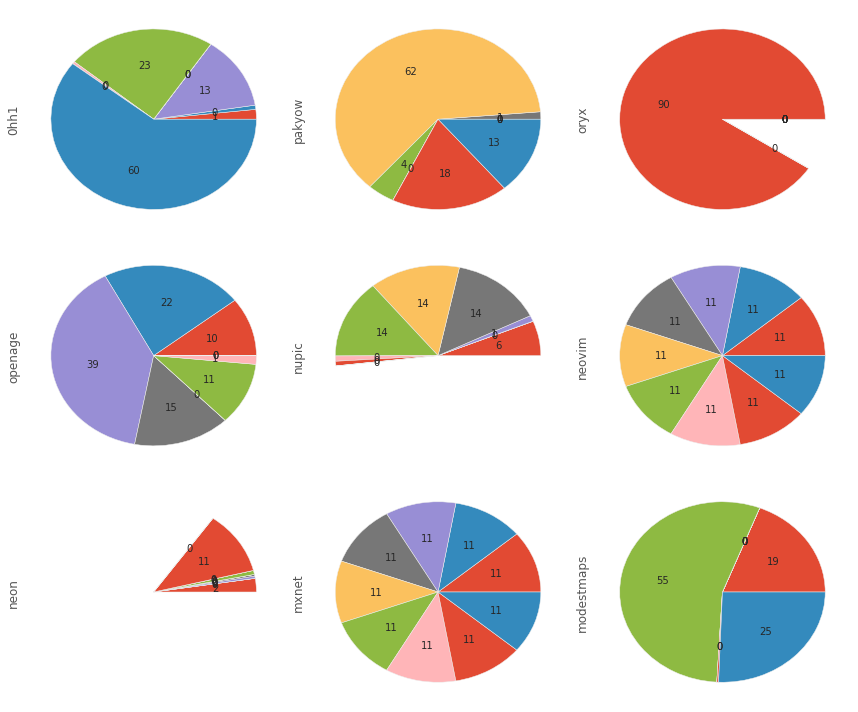

In [166]:
fig = plt.figure(1, figsize=(12,10))

df = latests_projects.reset_index(level=0)
df.set_index('project', inplace=True)
df = df.drop('index', axis=1).T[0:NUM_TOPICS-1]
df
for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    df.ix[:, i-1].astype(float).plot.pie(ax=ax, autopct='%.d',
                    labels=None#df.index.values
                                )

# h, l = ax.get_legend_handles_labels()
# plt.figlegend(h, df.index.values, loc='lower center',  ncol=5, bbox_to_anchor=(0.4, 0.02))
    
plt.tight_layout()
plt.savefig('project-topic'+suffix+'.png', dpi=400)


# 1- Each project evolution over time

101
0hh1 (1, 12)


/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


2048 (1, 12)
AtomicGameEngine (1, 12)
BEMSimpleLineGraph (1, 12)
BrowserQuest (1, 12)
CNTK (1, 12)
Caret (1, 12)
Chart.js (1, 12)
Dash (1, 12)
Decider (1, 12)
GD (1, 12)
GamePlay (1, 12)


/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


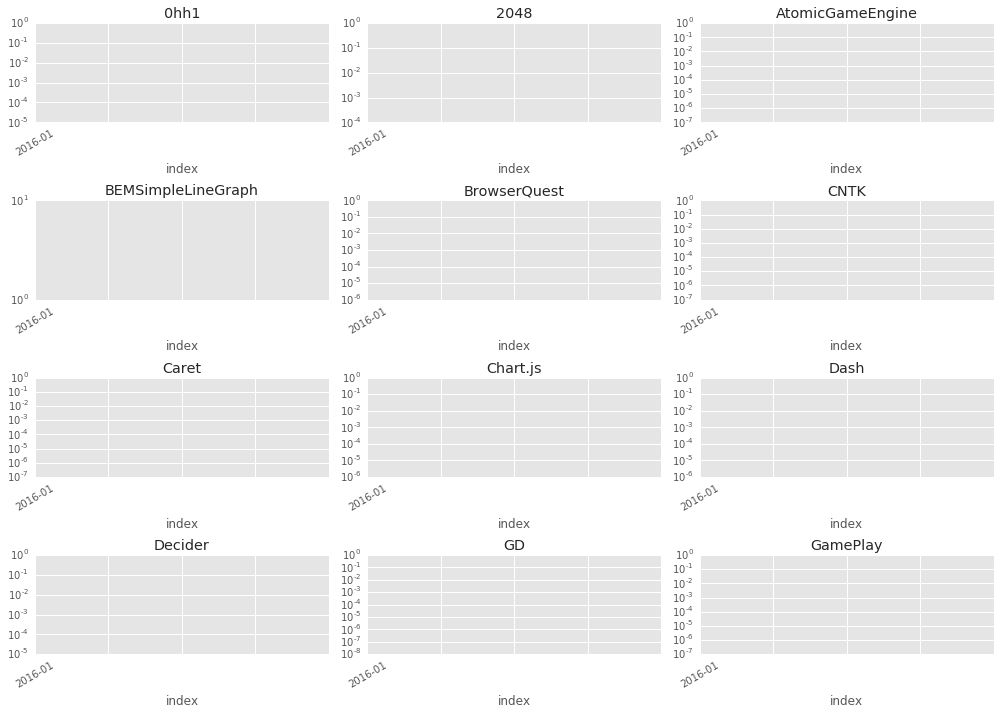

In [167]:
#Remove projects with unsuffient data
fig = plt.figure(3, figsize=(14,10))
to_remove = ['express', 'derby', 'flask', 'CodeIgniter']
temp = proj_topic[~proj_topic.project.isin(to_remove)]
proj_topic.shape

groups = temp.groupby('project')

i=1
print(groups.ngroups)
for name, p in groups:    
    ax = fig.add_subplot(4,3,i)
    i+=1
    ax = p[proj_topic.columns[0:NUM_TOPICS]].plot(logy=True, ax=ax)
    ax.set_xticklabels(p['date'].dt.strftime( "%Y-%m"))
    if p.shape[0] >10:
        ax.set_xticklabels([c for o,c in enumerate(p['date'].dt.strftime( "%Y-%m")) if o%2!=0])
        ax.set_xticks(np.arange(0, p.shape[0], 2))
    else:
        ax.set_xticklabels(p['date'].dt.strftime( "%Y-%m"))
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=30)
    ax.set_title(name)
    ax.legend([])
    print(name, p.shape)
    if i==13:
        break

plt.tight_layout()
fig.savefig('project_time'+suffix+'.png', dpi=350)

In [168]:
# proj_topic[proj_topic['project']=='django']


In [169]:
# proj_topic

In [170]:
# groups = proj_topic.groupby('date')#.sum()

# for i, g in groups:
#     print(i, g.sum())
# ax = groups.plot()
# ax.legend(bbox_to_anchor=(1.3, 1))
# ax.set_yticklabels([])
# ax.set_ylabel('density')

(1, 10)


/home/doaa/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735964.0, right=735964.0
  'left=%s, right=%s') % (left, right))


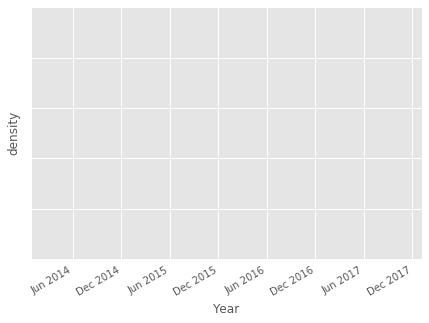

In [171]:
fig = plt.figure(5)
groups = proj_topic.groupby('date').mean()
print(groups.shape)

ax = groups.plot(figsize=(7,5))
# ax.legend(bbox_to_anchor=(1.25,.9))
ax.legend([])
ax.set_yticklabels([])
ax.set_ylabel('density')
ax.set_xlabel('Year')

# plt.tight_layout()
plt.savefig('topic_time'+suffix+'.png', bbox_inches='tight', dpi=350)

In [172]:

# proj_topic[proj_topic.date=='2016-01-01']

In [173]:
# f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
# for i, k in enumerate([0, 5, 9, 14, 19]):
#     ax[i].stem(topics.ix[k,:], linefmt='b-',
#                markerfmt='bo', basefmt='w-')
#     ax[i].set_xlim(-50,4350)
#     ax[i].set_ylim(0, 0.08)
#     ax[i].set_ylabel("Prob")
#     ax[i].set_title("topic {}".format(k))

# ax[4].set_xlabel("word")

# plt.tight_layout()


In [174]:
# df = proj_topic[proj_topic.date=='2016-01-01']


# f, ax= plt.subplots(7, 1, figsize=(8, 12), sharex=True)
# for i in range(7):
#     ax[i].stem(df.ix[i,0:10], linefmt='r-',
#                markerfmt='ro', basefmt='w-')
#     ax[i].set_xlim(-1, 21)
#     ax[i].set_ylim(0, 1)
#     ax[i].set_ylabel("Prob")
#     ax[i].set_title("{}".format(df.ix[i,10]))

# ax[6].set_xlabel("Topic")

# plt.tight_layout()
# plt.show()
# plt.savefig('project_topc'+suffix+'.png', bbox_inches='tight', dpi=350)

In [175]:
proj_topic.head()
# df = proj_topic[proj_topic.date=='2016-01-01']

# a = {}
# for i in range(NUM_TOPICS):
#     a[i] = df[df.ix[:,i]>0.8].project#.ix[:, 10:12]
#     print(len(a[i]))
#     a[i] = np.unique(a[i])
# a


,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date
index,,,,,,,,,,,,
0hh1,0.028756,0.012369,0.216766,0.000023,0.000023,0.386535,0.007014,0.000023,1.000000e+00,0.152223,0hh1,2016-01-01
pakyow,0.000009,0.000009,0.000009,0.021151,1.000000,0.069239,0.000009,0.296127,2.224413e-01,0.000009,pakyow,2016-01-01
oryx,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.908299,2.543116e-06,1.000000,oryx,2016-01-01
openage,0.267903,0.569120,1.000000,0.388766,0.000013,0.285047,0.039552,0.000013,1.302907e-05,0.221763,openage,2016-01-01
nupic,0.062032,0.000344,0.010436,0.143763,0.142702,0.141326,0.009469,0.008191,4.780554e-07,1.000000,nupic,2016-01-01


# Clustering Analysis

In [176]:
projects_details = pd.read_csv(os.path.join(base_dir, 'results/projects_details.csv'), index_col=0)
# projects_details.rename(columns={'index': 'project'}, inplace=True)
                               

/home/doaa/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


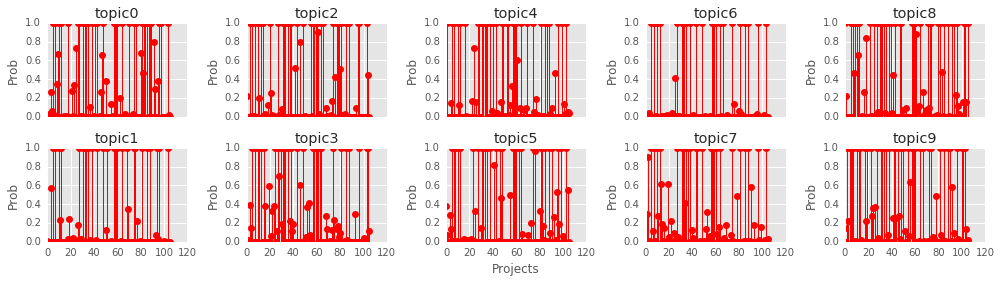

In [177]:
df = proj_topic[proj_topic.date=='2016-01-01']


f, ax= plt.subplots(2, 5, figsize=(14, 4), sharex=True)
for i in range(NUM_TOPICS):
    x = i%2
    y = int(i/2)
    ax[x][y].stem(df.ix[:,i], linefmt='r-',
               markerfmt='ro', basefmt='w-')
#     ax[x][y].set_xlim(-1, 21)
    ax[x][y].set_ylim(0, 1)
    ax[x][y].set_ylabel("Prob")
    ax[x][y].set_title("{}".format(df.columns[i]))

ax[x][y/2].set_xlabel("Projects")

plt.tight_layout()

plt.savefig('topic_projects'+suffix+'.png', bbox_inches='tight', dpi=350)

In [199]:
projects = pd.merge(projects_details, proj_topic, right_index=True, left_index=True)
categories = projects.groupby('group')
categories.ngroups

6

Data Visulization
Games Engines
Machine Learning
Text Editor
Web Framework
Web Games


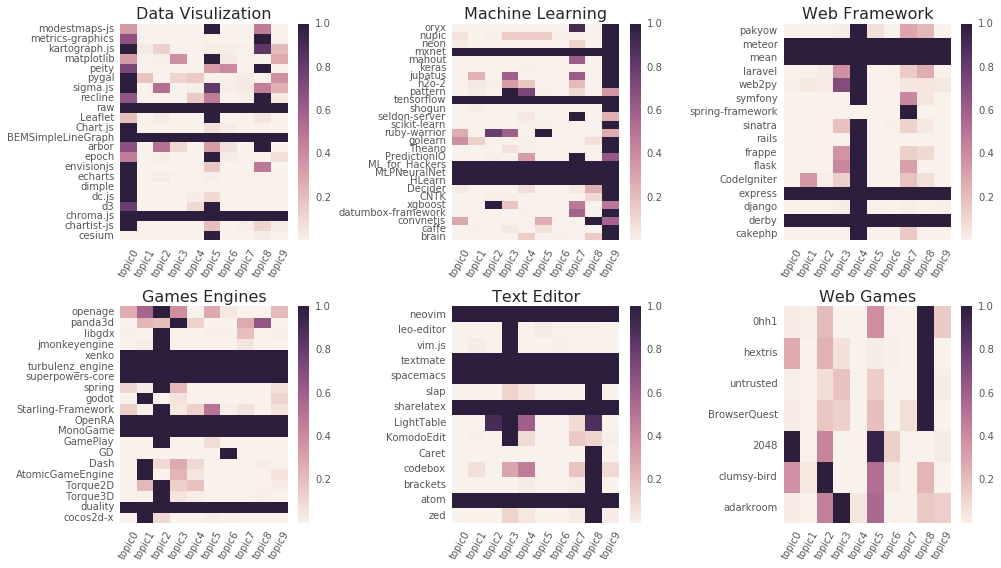

In [200]:
import seaborn as sns

f, ax= plt.subplots(2, 3, figsize=(14, 8))#, sharex=True)
   
for i, (name, g) in enumerate(categories):
    x = i%2
    y = int(i/2) 
    print(name)
    sns.heatmap(g.ix[:,2:NUM_TOPICS+2], ax=ax[x][y])#, cmap="RdBu_r", cbar=False)
    ax[x][y].set_title(name, fontsize=16)
    ax[x][y].set_ylabel('')
    labels = ax[x][y].get_xticklabels()
    plt.setp(labels, rotation=60)
    
plt.tight_layout()

plt.savefig('topic_projects_heatmap'+suffix+'.png', bbox_inches='tight', dpi=350)

In [212]:
projects['sum'] = projects.ix[:,2:2+NUM_TOPICS].sum(axis=1)
projects['type'].unique()

array(['JavaScript', 'ruby', 'Java', 'C++', 'Python', 'VimL', 'javascript',
       'php', 'HTML', 'C#', 'python', 'C', 'TypeScript', 'java',
       'Emacs Lisp', 'CoffeeScript', 'Ruby', 'Go', 'ActionScript', 'Scala',
       'R', 'Objective-C', 'Clojure', 'Haskell', 'D', 'CSS'], dtype=object)

In [213]:
projects[projects['sum'] >9]

,group,type,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,project,date,sum
index,,,,,,,,,,,,,,,
neovim,Text Editor,VimL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,neovim,2016-01-01,10.0
mxnet,Machine Learning,C++,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,mxnet,2016-01-01,10.0
meteor,Web Framework,javascript,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,meteor,2016-01-01,10.0
mean,Web Framework,javascript,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,mean,2016-01-01,10.0
xenko,Games Engines,C#,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,xenko,2016-01-01,10.0
turbulenz_engine,Games Engines,TypeScript,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,turbulenz,2016-01-01,10.0
textmate,Text Editor,C++,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,textmate,2016-01-01,10.0
tensorflow,Machine Learning,C++,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,tensorflow,2016-01-01,10.0
superpowers-core,Games Engines,TypeScript,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,superpowers,2016-01-01,10.0


In [225]:
types = projects['type'].unique()
groups = projects['group'].unique()
df = pd.DataFrame(columns=["JavaScript", "Ruby", "Java", "C/C++", "Python", "PHP", "C#", "Ruby", "Others"])
for d in projects.index:
    

,JavaScript,Ruby,Java,C/C++,Python,PHP,C#,Ruby,Others
